In [2]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [3]:
rootdir = '.'
chapterid = 'end_to_end_project'
imagespath = os.path.join(rootdir + 'images' + chapterid)
os.makedirs(imagespath, exist_ok = True)

In [4]:
def savefig(figid, tight_layout= True, fig_extension='png', resolution =  300):
  path = os.path.join(imagespath + figid + '.' + fig_extension)
  print('saving figure...', figid)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format = fig_extension, dpi = resolution)

## Get the data

In [5]:
import tarfile
import urllib.request

download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
housing_url = download_root + 'datasets/housing/housing.tgz'
housing_path = os.path.join('datasets' + 'housing')

def fetch_housing_data(hp = housing_path, hu = housing_url):
  if not os.path.isdir(hp):
    os.makedirs(hp)
  tp = os.path.join(hp,'housing.tgz')
  urllib.request.urlretrieve(hu, tp)
  ht = tarfile.open(tp)
  ht.extractall(path = hp)
  ht.close()

In [6]:
fetch_housing_data()

In [7]:
import pandas as pd

def load_housing_data(hp = housing_path):
  cp = os.path.join(hp, 'housing.csv')
  return pd.read_csv(cp)

In [8]:
h = load_housing_data()
h.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
h['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
h.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


saving figure... attribute_histogram


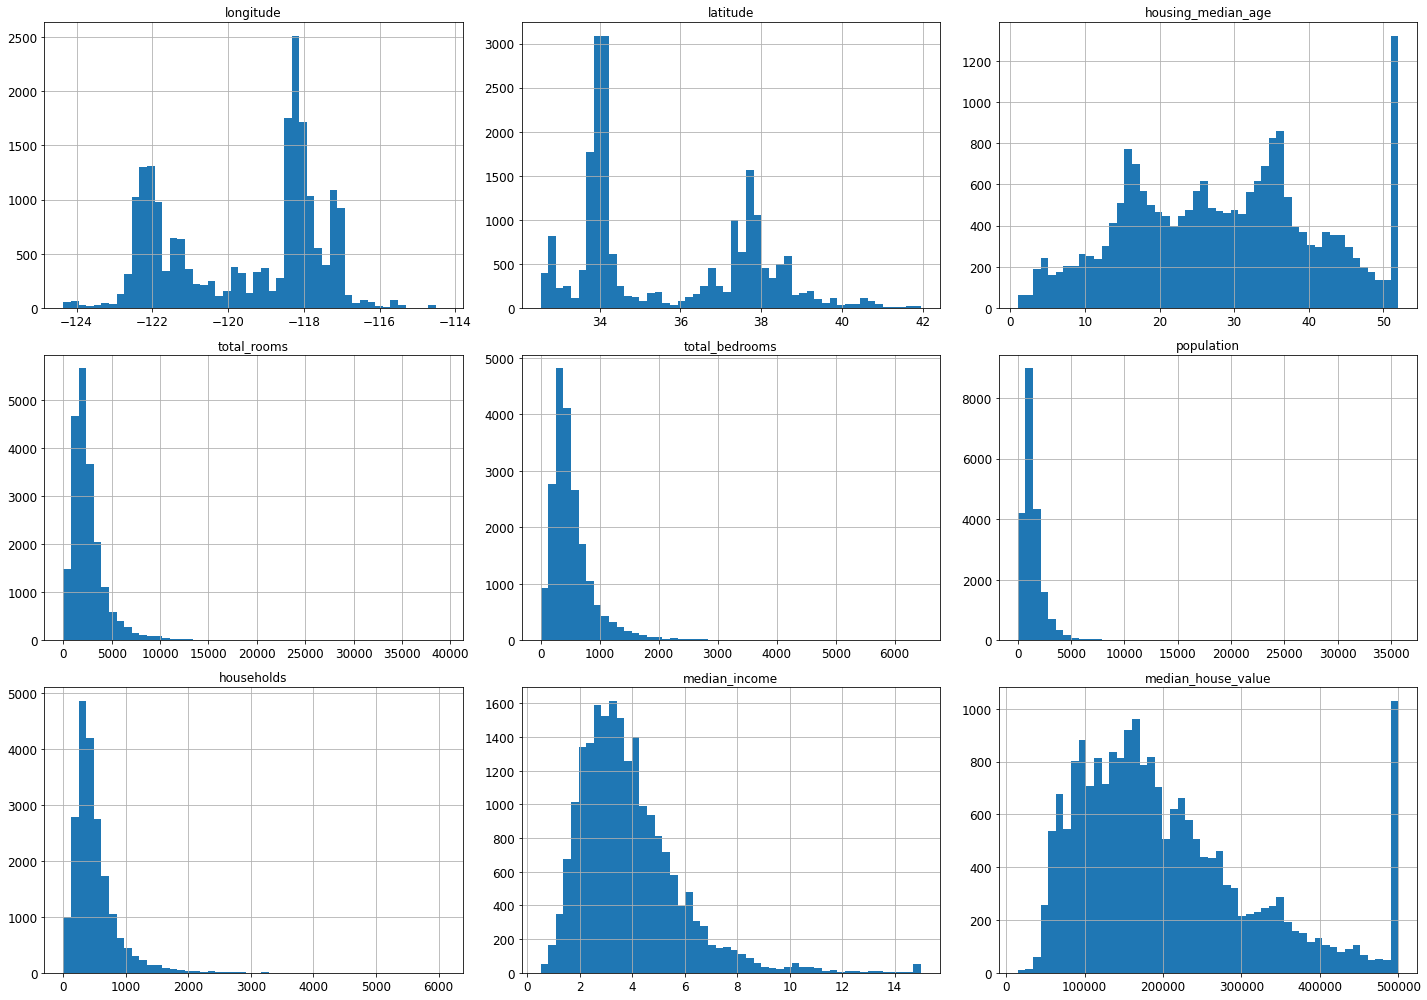

In [12]:
%matplotlib inline
h.hist(bins = 50, figsize = (20, 14))
savefig('attribute_histogram')

## Test set

In [13]:
from sklearn.model_selection import train_test_split

rs, es = train_test_split(h, test_size = 0.2, random_state = 9)

In [14]:
print(es.shape, rs.shape)

(4128, 10) (16512, 10)


In [15]:
es.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20558,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0,INLAND
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0,<1H OCEAN
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,NEAR OCEAN
14267,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0,NEAR OCEAN
3684,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0,<1H OCEAN


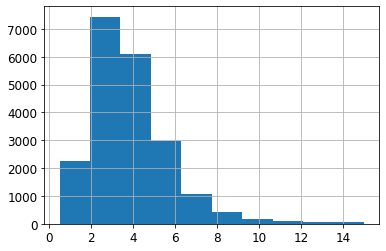

In [16]:
h['median_income'].hist();

In [17]:
h['income_cat'] = pd.cut(h['median_income'],
                         bins = [0.,1.5,3.,4.5,6,np.inf],
                         labels = [1,2,3,4,5])

In [18]:
h['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

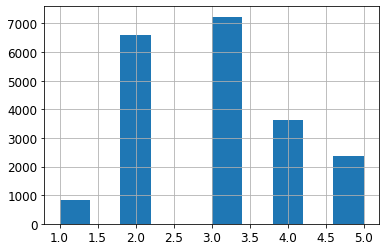

In [19]:
h['income_cat'].hist();

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 9)

for ri, ei in sss.split(h,h['income_cat']):
  sr = h.loc[ri]
  se = h.loc[ei]

In [21]:
se['income_cat'].value_counts()/len(se)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [22]:
h['income_cat'].value_counts()/len(h)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
def icp(d):
  return d['income_cat'].value_counts()/len(d)

In [24]:
rs, es = train_test_split(h, test_size = 0.2, random_state = 9)

cp = pd.DataFrame({'overall':icp(h),
                   'stratified':icp(se),
                   'random':icp(es),}).sort_index()

cp['rand % error'] = 100*cp['random']/cp['overall']-100
cp['strat % error'] = 100*cp['stratified']/cp['overall']-100

In [25]:
cp

,overall,stratified,random,rand % error,strat % error
1,0.039826,0.039971,0.039002,-2.068127,0.364964
2,0.318847,0.318798,0.307655,-3.510105,-0.015195
3,0.350581,0.350533,0.356105,1.575456,-0.013820
4,0.176308,0.176357,0.186531,5.798296,0.027480
5,0.114438,0.114341,0.110707,-3.259949,-0.084674


## Data Visualization

saving figure... housing price map


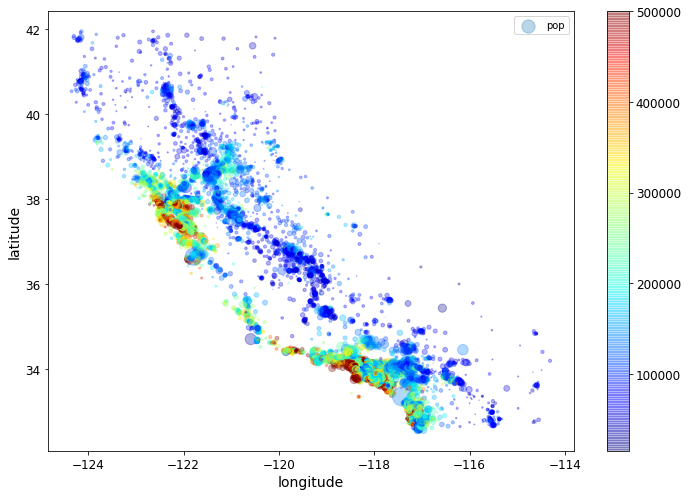

In [26]:
h.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3,
       s = h['population']/100, label = 'pop', figsize = (10,7),
       c = h['median_house_value'], cmap = 'jet', sharex = False);
savefig('housing price map')

In [27]:
corr = h.corr()
abs(corr['median_house_value']).sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

saving figure... attributes scatter matrix


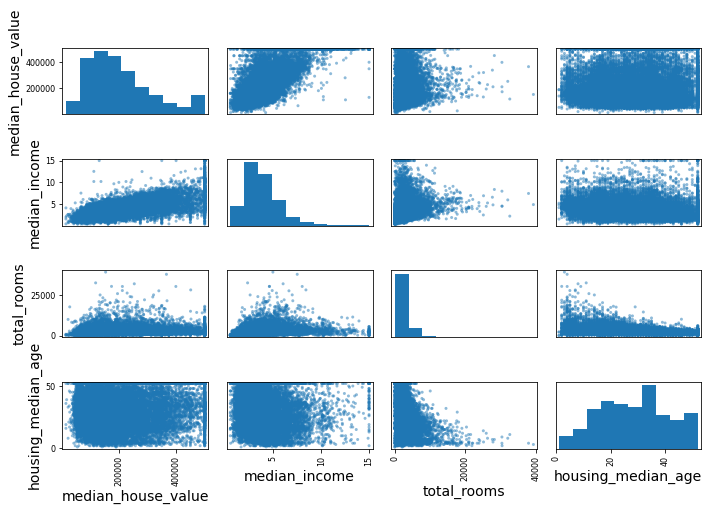

In [28]:
from pandas.plotting import scatter_matrix

atr = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(h[atr], figsize = (10,7))
savefig('attributes scatter matrix')

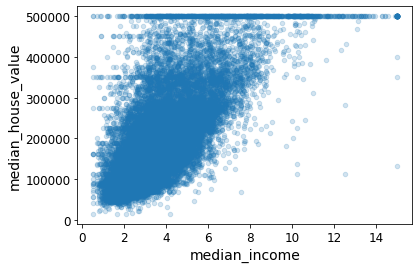

In [29]:
h.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value',alpha = 0.2);

## Feature extraction

In [30]:
h['room/household'] = h['total_rooms']/h['households']
h['pop/household'] = h['population']/h['households']
h['bedrooms/room'] = h['total_bedrooms']/h['total_rooms']

In [31]:
corr = h.corr()
abs(corr['median_house_value']).sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
bedrooms/room         0.255880
room/household        0.151948
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
pop/household         0.023737
Name: median_house_value, dtype: float64

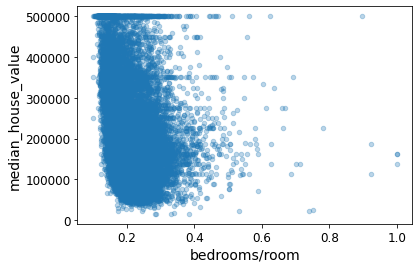

In [32]:
h.plot(kind = 'scatter', x = 'bedrooms/room', y = 'median_house_value', alpha = 0.3);

In [33]:
h.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room/household,pop/household,bedrooms/room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,3.070655,0.213039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,10.386050,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,2.429741,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,2.818116,0.203162
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,3.282261,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


In [34]:
j = rs.drop(columns = ['income_cat'])
t = j.drop('median_house_value', axis = 1)
hl = j['median_house_value']

## Data cleaning

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

rx, bx, px, hx = 3,4,5,6

class caa(BaseEstimator, TransformerMixin):

  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self,X,y = None):
    return self
  
  def transform(self,X):
    room_household = X[:,rx]/X[:,hx]
    pop_household = X[:,px]/X[:,hx]

    if self.add_bedrooms_per_room:
      bedrooms_room = X[:,bx]/X[:,rx]
      return np.c_[X,room_household,pop_household,bedrooms_room]
    else:
      return np.c_[X,room_household,pop_household]

atb_add = caa(add_bedrooms_per_room = True)
nh = atb_add.transform(t.values)

In [36]:
coln = 'total_rooms', 'total_bedrooms', 'population', 'households'

rx,bx,px,hx = [t.columns.get_loc(c) for c in coln]

In [37]:
nh = pd.DataFrame(nh, columns = list(t.columns)+['rooms/household','pop/household','bedrooms/room'],
                  index = t.index)

nh.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms/household,pop/household,bedrooms/room
15404,-117.24,33.23,13.0,3756.0,648.0,1767.0,614.0,4.0776,<1H OCEAN,6.117264,2.87785,0.172524
16396,-121.24,38.01,22.0,1526.0,299.0,790.0,300.0,2.4342,INLAND,5.086667,2.633333,0.195937
2428,-119.52,36.61,33.0,1225.0,275.0,1065.0,248.0,1.8958,INLAND,4.939516,4.294355,0.22449
7702,-118.13,33.96,36.0,1933.0,341.0,958.0,335.0,4.4732,<1H OCEAN,5.770149,2.859701,0.17641
12966,-121.32,38.7,16.0,2966.0,578.0,1365.0,480.0,3.2444,INLAND,6.179167,2.84375,0.194875


## Transformation pipelines

In [38]:
hn = j.drop(columns = ['ocean_proximity','ocean_proximity'], axis = 1)
hc = j['ocean_proximity']

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([
                     ('imputer',SimpleImputer(strategy = 'median')),
                     ('atb_add',caa()),
                     ('std_scaler',StandardScaler())
])

In [40]:
t.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [41]:
from sklearn.compose import ColumnTransformer

na = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
ca = ['ocean_proximity']

full_pipe = ColumnTransformer([('num',num_pipe,na),
                               ('cat',OneHotEncoder(),ca),
])

hp = full_pipe.fit_transform(t)

In [42]:
hp

array([[ 1.16463045, -1.12544636, -1.24085079, ...,  0.        ,
         0.        ,  0.        ],
       [-0.82957402,  1.10717969, -0.52698954, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0279339 ,  0.45327248,  0.34550754, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.62619524, -0.7657974 ,  1.69391211, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34308168,  1.42012099, -0.8442612 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.34308168,  1.03244743,  1.85254794, ...,  0.        ,
         1.        ,  0.        ]])

In [43]:
hp.shape

(16512, 16)

## Model

Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(hp,hl)

LinearRegression()

In [45]:
sd = t.iloc[:5]
sl = hl.iloc[:5]

sdp = full_pipe.transform(sd)
print('prediction : ',lr.predict(sdp))
print()
print('labels : ',list(sl))

prediction :  [205583.61370527  95740.86799299  62515.9683648  246248.65668776
 110158.7637658 ]

labels :  [196000.0, 125000.0, 55100.0, 266000.0, 118400.0]


In [46]:
sdp

array([[ 1.16463045, -1.12544636, -1.24085079,  0.51942566,  0.26675741,
         0.30490893,  0.302215  ,  0.1125571 ,  0.29778876, -0.02322898,
        -0.62129399,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.82957402,  1.10717969, -0.52698954, -0.5096519 , -0.5643137 ,
        -0.55841322, -0.51957427, -0.75227241, -0.14622483, -0.06130691,
        -0.27033623,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.0279339 ,  0.45327248,  0.34550754, -0.6485543 , -0.62146472,
        -0.31541057, -0.65566676, -1.03560222, -0.2096219 ,  0.19735941,
         0.15766269,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.72091995, -0.78448046,  0.58346128, -0.32183371, -0.46429941,
        -0.40996069, -0.42797356,  0.32073925,  0.14824091, -0.02605522,
        -0.56304722,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.86945811,  1.42946253, -1

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

hn = lr.predict(hp)

print('mean squared error : ', np.sqrt(mean_squared_error(hl,hn)))
print('mean absolute error : ', mean_absolute_error(hl,hn))

mean squared error :  67983.96121425589
mean absolute error :  49226.98337643414


Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(hp,hl)

DecisionTreeRegressor()

In [49]:
hn = dt.predict(hp)

print('mean squared error : ', np.sqrt(mean_squared_error(hl,hn)))
print('mean absolute error : ', mean_absolute_error(hl,hn))

mean squared error :  0.0
mean absolute error :  0.0


### Cross validation

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt,hp,hl,scoring = 'neg_mean_squared_error', cv = 10)

rmse = np.sqrt(-scores)

In [51]:
def display_scores(s):
  print('scores : ',s)
  print('mean : ',s.mean())
  print('standard deviation : ',s.std())

display_scores(rmse)

scores :  [70477.98158672 68444.62091619 72201.50849614 69374.12068535
 70581.12739048 67629.43335832 70992.25464388 70129.24877265
 71091.2613478  68270.93258671]
mean :  69919.24897842322
standard deviation :  1376.950362607405


In [52]:
scores = cross_val_score(lr,hp,hl,scoring = 'neg_mean_squared_error', cv = 10)
rmse = np.sqrt(-scores)
display_scores(rmse)

scores :  [66935.70521585 68893.87301725 69963.29317622 68206.06369561
 70005.48042151 67160.35005783 66586.0534263  71168.51908242
 67005.03426018 67254.8310818 ]
mean :  68317.92034349657
standard deviation :  1520.820062609981


Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=9)
rf.fit(hp,hl)

RandomForestRegressor(random_state=9)

In [54]:
hn = rf.predict(hp)

scores = cross_val_score(rf,hp,hl,scoring = 'neg_mean_squared_error', cv = 10)
rmse = np.sqrt(-scores)
display_scores(rmse)

scores :  [49889.75173942 48568.20836711 51108.54454606 50080.73574048
 50215.96058408 48735.74549339 49754.97112667 49362.03252941
 50308.9089821  48430.9117995 ]
mean :  49645.57709082071
standard deviation :  819.2006993193083


In [55]:
scores = cross_val_score(lr,hp,hl,scoring = 'neg_mean_squared_error')
pd.Series(np.sqrt(-scores)).describe()

count        5.000000
mean     68492.971358
std       1024.522581
min      67125.650267
25%      67926.165253
50%      68646.906278
75%      68936.126939
max      69830.008053
dtype: float64

Support Vector Machine

In [56]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(hp, hl)
hn = svr.predict(hp)

scores = cross_val_score(svr,hp,hl,scoring = 'neg_mean_squared_error', cv = 10)
rmse = np.sqrt(-scores)
display_scores(rmse)

scores :  [108894.60047937 111683.29280687 106225.67159937 107629.49560685
 115714.87995415 111061.58500141 111619.68099536 115056.92045976
 113437.04362931 110137.50208837]
mean :  111146.06726208379
standard deviation :  2908.613577603358


### Fine-tune model

Grid search

In [57]:
from sklearn.model_selection import GridSearchCV

pg = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
      {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

rf = RandomForestRegressor(random_state=9)

gs = GridSearchCV(rf, pg, cv=5, scoring = 'neg_mean_squared_error',
                  return_train_score = True)
gs.fit(hp,hl)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=9),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
gs.best_params_

{'max_features': 6, 'n_estimators': 30}

In [59]:
gs.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=9)

In [60]:
cv = gs.cv_results_

for mean_score, params in zip(cv['mean_test_score'], cv['params']):
  print(np.sqrt(-mean_score),params)

62463.060344655496 {'max_features': 2, 'n_estimators': 3}
55009.35789970503 {'max_features': 2, 'n_estimators': 10}
52364.41343580147 {'max_features': 2, 'n_estimators': 30}
60319.67650688086 {'max_features': 4, 'n_estimators': 3}
52287.33091007534 {'max_features': 4, 'n_estimators': 10}
50314.8548760673 {'max_features': 4, 'n_estimators': 30}
59125.97659045358 {'max_features': 6, 'n_estimators': 3}
52199.52665449093 {'max_features': 6, 'n_estimators': 10}
49507.66628862041 {'max_features': 6, 'n_estimators': 30}
59735.35203050823 {'max_features': 8, 'n_estimators': 3}
52137.18192518673 {'max_features': 8, 'n_estimators': 10}
49817.3770084275 {'max_features': 8, 'n_estimators': 30}
60372.2048331506 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53608.57148359926 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58932.011041523336 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52180.36127506282 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [61]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072690,0.000777,0.005166,0.000143,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.764482e+09,-3.677117e+09,...,-3.901634e+09,1.519305e+08,18,-1.058609e+09,-9.858817e+08,-1.113166e+09,-1.098045e+09,-1.097967e+09,-1.070734e+09,4.611940e+07
1,0.232387,0.004630,0.014581,0.000911,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.987527e+09,-2.942701e+09,...,-3.026029e+09,6.403866e+07,11,-5.772516e+08,-5.567247e+08,-5.843918e+08,-5.930665e+08,-5.767067e+08,-5.776283e+08,1.201694e+07
2,0.825870,0.166826,0.041493,0.002491,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.674467e+09,-2.704220e+09,...,-2.742032e+09,5.441171e+07,9,-4.271164e+08,-4.201514e+08,-4.264076e+08,-4.280665e+08,-4.209136e+08,-4.245311e+08,3.315768e+06
3,0.123916,0.015717,0.005279,0.000351,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.547670e+09,-3.786726e+09,...,-3.638463e+09,8.433850e+07,16,-9.845284e+08,-1.021932e+09,-9.826055e+08,-9.974291e+08,-9.231793e+08,-9.819349e+08,3.255537e+07
4,0.384693,0.006842,0.013819,0.000240,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.592626e+09,-2.888600e+09,...,-2.733965e+09,9.746225e+07,8,-5.140464e+08,-5.268740e+08,-5.033149e+08,-5.166642e+08,-5.052111e+08,-5.132221e+08,8.499774e+06
5,1.138221,0.009420,0.038300,0.000434,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.411889e+09,-2.624128e+09,...,-2.531585e+09,6.855939e+07,3,-3.950251e+08,-3.900277e+08,-3.806245e+08,-3.916234e+08,-3.825960e+08,-3.879793e+08,5.480743e+06
6,0.163482,0.002773,0.005034,0.000219,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.322806e+09,-3.507402e+09,...,-3.495881e+09,9.981593e+07,14,-9.228164e+08,-9.184017e+08,-9.320490e+08,-9.263012e+08,-9.499945e+08,-9.299126e+08,1.098860e+07
7,0.525415,0.006322,0.013676,0.000189,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.573330e+09,-2.711564e+09,...,-2.724791e+09,8.942834e+07,7,-5.001714e+08,-5.008859e+08,-4.987259e+08,-5.032417e+08,-4.974771e+08,-5.001004e+08,1.962669e+06
8,1.577005,0.011263,0.037860,0.000445,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.354341e+09,-2.499097e+09,...,-2.451009e+09,5.882577e+07,1,-3.750846e+08,-3.767790e+08,-3.798941e+08,-3.752216e+08,-3.767552e+08,-3.767469e+08,1.731800e+06
9,0.209806,0.004769,0.005100,0.000123,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.546246e+09,-3.759343e+09,...,-3.568312e+09,1.257141e+08,15,-9.277717e+08,-9.098994e+08,-9.021147e+08,-9.144875e+08,-8.863425e+08,-9.081232e+08,1.371291e+07


Random search

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

pd = {'n_estimators':randint(low=1, high=200),
      'max_features':randint(low=1, high=8)}

rs = RandomizedSearchCV(rf, pd, n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error',
                        random_state = 9)
rs.fit(hp,hl)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=9),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa12c728b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa12c7d8410>},
                   random_state=9, scoring='neg_mean_squared_error')

In [63]:
cv = rs.cv_results_

for mean_score, params in zip(cv['mean_test_score'], cv['params']):
  print(np.sqrt(-mean_score),params)

49191.10029756976 {'max_features': 7, 'n_estimators': 93}
48901.85708210102 {'max_features': 7, 'n_estimators': 183}
53919.7173544702 {'max_features': 1, 'n_estimators': 151}
49112.39101234396 {'max_features': 6, 'n_estimators': 66}
48901.54441640449 {'max_features': 7, 'n_estimators': 181}
50003.39477819512 {'max_features': 4, 'n_estimators': 41}
50044.747143147106 {'max_features': 3, 'n_estimators': 118}
49194.5257686496 {'max_features': 4, 'n_estimators': 162}
48859.85271511845 {'max_features': 6, 'n_estimators': 129}
48820.51898419191 {'max_features': 5, 'n_estimators': 188}


Best model

In [64]:
fi = gs.best_estimator_.feature_importances_
fi

array([0.08059151, 0.06839831, 0.0399587 , 0.01687187, 0.01657445,
       0.01768238, 0.01543476, 0.32868665, 0.05543332, 0.10193168,
       0.0724319 , 0.01169663, 0.16543426, 0.00035641, 0.00448398,
       0.0040332 ])

In [73]:
x_atbs = ['rooms/hhold','pop/hhold','bedrooms/room']
cen = full_pipe.named_transformers_['cat']
ohe_atbs = list(cen.categories_[0])
num_atbs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
atbs = num_atbs + x_atbs + ohe_atbs
sorted(zip(fi,atbs))

[(0.00035640713003589063, 'ISLAND'),
 (0.004033197709607809, 'NEAR OCEAN'),
 (0.0044839830624314354, 'NEAR BAY'),
 (0.011696627390374132, '<1H OCEAN'),
 (0.015434764205932127, 'households'),
 (0.01657444920058827, 'total_bedrooms'),
 (0.016871865476152444, 'total_rooms'),
 (0.01768237913622394, 'population'),
 (0.03995869979225991, 'housing_median_age'),
 (0.05543332113720332, 'rooms/hhold'),
 (0.06839830764766697, 'latitude'),
 (0.072431901007094, 'bedrooms/room'),
 (0.08059151432797704, 'longitude'),
 (0.10193167840954163, 'pop/hhold'),
 (0.16543425592004243, 'INLAND'),
 (0.3286866484468688, 'median_income')]

Evaluate on test set

In [78]:
m = gs.best_estimator_

test = es.drop(['income_cat'], axis = 1)
xe = test.drop(['median_house_value'], axis = 1)
ye = test['median_house_value'].copy()

xp = full_pipe.transform(xe)
fp = m.predict(xp)

print('rmse : ',np.sqrt(mean_squared_error(ye,fp)))

rmse :  49620.58081711917


In [80]:
from scipy import stats

con = 0.95
sq_e = (fp-ye)**2
np.sqrt(stats.t.interval(con, len(sq_e)-1,loc = sq_e.mean(), scale = stats.sem(sq_e)))

array([47269.64058054, 51865.06686242])

Full pipeline with preparation and prediction

In [83]:
Predict_pipe = Pipeline([
                       ('preparation',full_pipe),
                       ('linear',LinearRegression())
])

Predict_pipe.fit(t, hl)
Predict_pipe.predict(sd)

array([205583.61370527,  95740.86799299,  62515.9683648 , 246248.65668776,
       110158.7637658 ])

Model persistence using joblib

In [84]:
model = Predict_pipe

import joblib

joblib.dump(model,'linear_model.pkl')
model_loaded = joblib.load('linear_model.pkl')

### Exercise solutions

1. Question: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [87]:
pg1 = [{'kernel':['linear'],'C':[10.,30.,100.,300.,1000.,3000.,10000.,30000.]},
       {'kernel':['rbf'],'C':[0.01,0.03,0.1,0.3,1.,3.],'gamma':[.01,0.03,0.1,0.3,1.0,3.0]}]
svm = SVR()
gs1 = GridSearchCV(svm, pg1, cv = 5, scoring = 'neg_mean_squared_error', verbose = 2)
gs1.fit(hp,hl)

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  10.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.8s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.2s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.6s
[CV] END ..............................C=10.0, kernel=linear; total time=  15.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  15.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  13.5s
[CV] END ..............................C=30.0, kernel=linear; total time=  11.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.5s
[CV] END .............................C=100.0, kernel=linear; total time=   7.6s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
nmse = gs1.best_score_
rmse = np.sqrt(-nmse)
rmse

69735.45591109115

In [90]:
gs1.best_params_

{'C': 30000.0, 'kernel': 'linear'}

2.
Question: Try replacing GridSearchCV with RandomizedSearchCV.

In [91]:
from scipy.stats import expon, reciprocal

pd2 = {'kernel':['linear','rbf'],
       'C':reciprocal(20,20000),
       'gamma':expon(scale = 1.0)}

rs2 = RandomizedSearchCV(svm, pd2, n_iter = 50, cv = 5, scoring = 'neg_mean_squared_error',
                         verbose = 2, random_state = 42)
rs2.fit(hp,hl)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.6s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.7s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.7s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.7s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.6s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  14.1s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  14.1s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  14.1s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  15.2s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  14.1s
[CV] END C=58.750769152656574, gamma=0.059838768608680676,

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa11ba60750>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa11baca350>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
nmse = rs2.best_score_
rmse = np.sqrt(-nmse)
rmse

58518.3867829494

In [93]:
rs2.best_params_

{'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

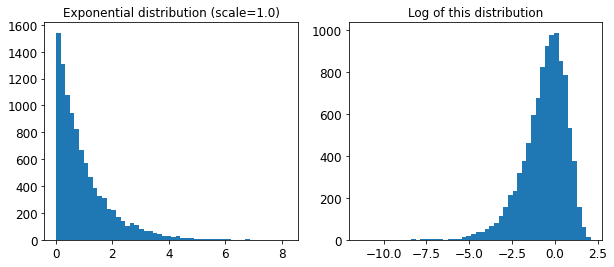

In [94]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

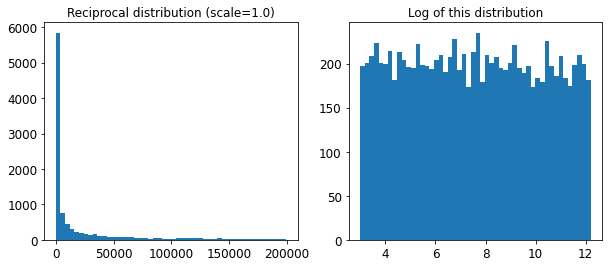

In [95]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

3. Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [96]:
def top_indices(arr,k):
  return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class topfeature_selector(BaseEstimator, TransformerMixin):
  def __init__(self, fi, k):
    self.fi = fi
    self.k = k

  def fit(self,X,y = None):
    self.feature_indices_ = top_indices(self.fi,self.k)
    return self
  
  def transform(self,X):
    return X[:, self.feature_indices_]

In [97]:
k = 5

In [98]:
top_fi = top_indices(fi, k )
top_fi

array([ 0,  7,  9, 10, 12])

In [99]:
np.array(atbs)[top_fi]

array(['longitude', 'median_income', 'pop/hhold', 'bedrooms/room',
       'INLAND'], dtype='<U18')

In [100]:
sorted(zip(fi,atbs), reverse = True)[:k]

[(0.3286866484468688, 'median_income'),
 (0.16543425592004243, 'INLAND'),
 (0.10193167840954163, 'pop/hhold'),
 (0.08059151432797704, 'longitude'),
 (0.072431901007094, 'bedrooms/room')]

In [101]:
selection_pipe = Pipeline([
                           ('preparation',full_pipe),
                           ('feature_selection',topfeature_selector(fi,k))
])

In [102]:
tfh = selection_pipe.fit_transform(t)

In [103]:
tfh[0:3]

array([[ 1.16463045,  0.1125571 , -0.02322898, -0.62129399,  0.        ],
       [-0.82957402, -0.75227241, -0.06130691, -0.27033623,  1.        ],
       [ 0.0279339 , -1.03560222,  0.19735941,  0.15766269,  1.        ]])

In [105]:
hp[0:3,top_fi]

array([[ 1.16463045,  0.1125571 , -0.02322898, -0.62129399,  0.        ],
       [-0.82957402, -0.75227241, -0.06130691, -0.27033623,  1.        ],
       [ 0.0279339 , -1.03560222,  0.19735941,  0.15766269,  1.        ]])

4. Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [106]:
svm_pipe = Pipeline([
    ('preparation', full_pipe),
    ('feature_selection', topfeature_selector(fi, k)),
    ('svm_reg', SVR(**rs2.best_params_))
])

In [108]:
svm_pipe.fit(t,hl)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('atb_add',
                                                                   caa()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                              

In [109]:
sd = t.iloc[:4]
sl = hl.iloc[:4]

print('predictions:\t',svm_pipe.predict(sd))
print('labels:\t',list(sl))

predictions:	 [182948.84219652  94699.32096056  52381.11406221 225773.01389526]
labels:	 [196000.0, 125000.0, 55100.0, 266000.0]


5. Question: Automatically explore some preparation options using GridSearchCV.

In [ ]:
full_pipe.named_transformers_["cat"].handle_unknown = 'ignore'

pg4 = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(fi) + 1))
}]

gs3 = GridSearchCV(svm_pipe, pg4, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
gs3.fit(t, hl)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  13.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

In [111]:
gs3.best_params_

{'feature_selection__k': 10,
 'preparation__num__imputer__strategy': 'most_frequent'}